In [27]:
import numpy as np
import  matplotlib.pyplot as plt
from sklearn import  datasets


In [28]:
iris=datasets.load_iris()
x=iris.data[:,2:]
y=iris.target

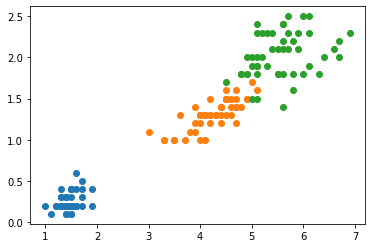

In [29]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

In [30]:
from sklearn.tree import  DecisionTreeClassifier

In [31]:

dt_clf=DecisionTreeClassifier(max_depth=2,criterion="entropy")
dt_clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

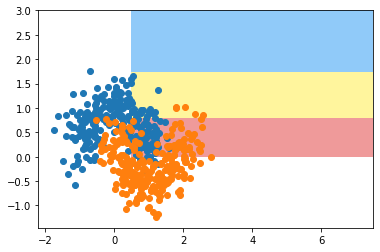

In [43]:
def plot_decision(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
    np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)))

    x_new=np.c_[x0.ravel(),x1.ravel()]

    y_predict=model.predict(x_new)
    zz=y_predict.reshape(x0.shape)

    from matplotlib.colors import  ListedColormap
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)

plot_decision(dt_clf,axis=[0.5,7.5,0,3])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

[Text(133.92000000000002, 181.2, 'X[1] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

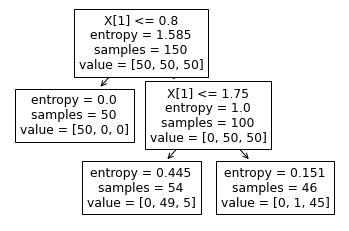

In [34]:
from sklearn import tree
tree.plot_tree(dt_clf)

In [ ]:
#Exercise 01:
# algorithm parameters:
# splitter：best：样本小时候 bias 较小，样本大时候 bias较大
#           random： 样本小时候 bias 较大，样本大时候 bias较小
# max_features：取得的最大特征数。特征越多，variance 越大，bias 越小。
# max_depth： 越大时越容易过拟合，variance越大，bias 越小
# min_samples_split：设置节点的最小样本数。最小样本数越大，bias 越大
# min_samples_leaf:取传入值本身作为最小样本数. 值越大，bias 越大
# max_leaf_nodes： 最大叶子结点数，越大，越容易过拟合，variance越大，bias 越小
# min_impurity_split:信息增益的阀值.越大则bias越大
# class_weight：	类别权重 越大bias 越大

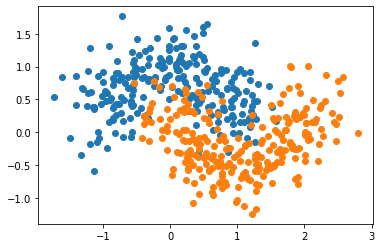

In [35]:
x,y=datasets.make_moons(n_samples=500,noise=0.3,random_state=42)
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

In [36]:
from  sklearn.ensemble import  BaggingClassifier

In [37]:
bagging_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=300,
                              max_samples=300,
                              bootstrap=True,
                              oob_score=True)
bagging_clf.fit(x,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=300,
                  n_estimators=300, oob_score=True)

In [19]:
bagging_clf.oob_score_

0.91

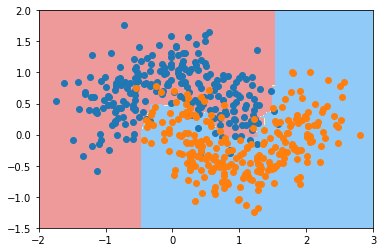

In [44]:
plot_decision(bagging_clf,axis=[-2,3,-1.5,2])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

In [39]:
from  sklearn.ensemble import  RandomForestClassifier

In [46]:
rf_clf=RandomForestClassifier(n_estimators=300,random_state=666,oob_score=True)
rf_clf.fit(x,y)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=666)

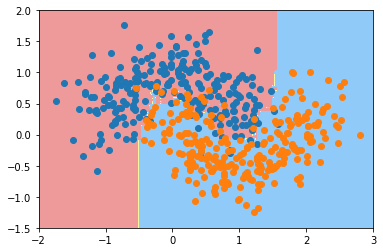

In [47]:

plot_decision(rf_clf,axis=[-2,3,-1.5,2])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

In [ ]:
#Exercise2
BaggingClassifier( ):
base_estimator : 对象或无，可选（默认=无）
基本估计量适合数据集的随机子集。如果为None，则基本估计量为决策树。 无影响
n_estimators : int，可选（默认值为10）集合中的基本估计量。越大
max_samples： 有放回的取的实例数目。越大u越不准确，方差变小
bootstrap：是否抽取样本进行替换。  这个感觉无明显影响
max_features，表示的是最大采样特征的数量 越大u越准确，方差变大
oob_score=True： 表示包外评估         使用包外评估则u更具有解释性，更准确
n_jobs： 训练和预测所需要的的CPU核的数量  无影响
random_state : 整型，RandomState实例或无，可选（默认值：无）
如果为int，则random_state是随机数生成器使用的种子   无影响


RandomForestClassifier：
max_features：随机森林允许单个决策树使用特征的最大数量  越大u越准确，方差变大
n_estimators： 子树的数量  越大u越准确，方差变大
criterion：分裂节点所用的标准  不确定影响
max_depth：树的最大深度  太小的话u不准确，方差小。太深的话u准确，方差大
min_samples_split：拆分内部节点所需的最少样本数 ，会从而影响树的深度来影响u和方差
min_samples_leaf：在叶节点处需要的最小样本数 ，会从而影响树的深度来影响u和方差
bootstrap：次有放回地随机选取样本， 有放回 更准确
oob_score：是否使用袋外样本来估计泛化精度。使用包外估计更加精准
n_jobs：并行计算数        无影响
random_state：控制bootstrap的随机性以及选择样本的随机性  无影响
class_weight：每个类的权重   对于数量不平衡若没有权重则预测会偏差较大，u较不精准
max_samples：X抽取以训练每个基本分类器的样本数。会从而影响树的深度来影响u和方差

bagging 算法可以提高稳定性和准确性。减少模型的方差从而避免overfitting。可以改良不稳定算法的性能
增加一些模型的偏差和丢失一些可解释性。

随机森林在生成决策树的时候用随机选择的特征，这些特征会被每个决策树所应用，这样会导致树之间具有相关性，这样并不会减小模型的方差。



In [ ]:
Question：
1、
我认为不能用于非监督学习。因为决策树的评价机制是进行评分然后最后较检正确与否，没有一个很好的变量可以描述不同数据的相似性。
然后降维可以被运用，因为降维是将原来多个维度的数据映射减少维度。决策树可以通过监督学习进行相应的划分分类。


2、
决策树的优点
(1)速度快: 计算量相对较小, 且容易转化成分类规则.
(2)准确性高: 挖掘出来的分类规则准确性高, 便于理解, 决策树可以清晰的显示哪些字段比较重要, 即可以生成可以理解的规则.
(3)可以处理连续和种类字段
(4)不需要任何领域知识和参数假设
(5)适合高维数据

随机森林的优点：
能够处理很高维度（feature很多）的数据，并且不用做特征选择
在训练完后，它能够给出哪些feature比较重要
创建随机森林的时候，对generlization error使用的是无偏估计，模型泛化能力强
训练时树与树之间是相互独立的
 在训练过程中，能够检测到feature间的互相影响
 对于不平衡的数据集来说，它可以平衡误差



3、决策树的缺点：
(1)对于各类别样本数量不一致的数据, 信息增益偏向于那些更多数值的特征
(2)容易过拟合
(3)忽略属性之间的相关性


随机森林的缺点：
被证明在某些噪音较大的分类或回归问题上会过拟
对于有不同取值的属性的数据，取值划分较多的属性会对随机森林产生更大的影响


4）如果对数据足够了解，那么对于数据中属性关联不强的可以选用决策树，这样误差较小。而且如果数据的维度过高，
决策树有良好的运行结果。而且还可以提前对数据进行一定的降噪处理，这样，随机森林算法就不会过拟合。而且对于样本数量
不同的数据，自己也有很好的判断。